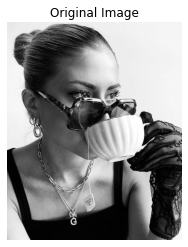

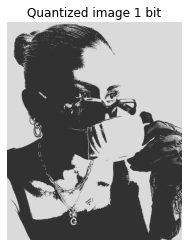

In [ ]:
#to be fixed
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image
#####################################################
## a) Cuantice una imagen con 1 bit de profundidad ##
#####################################################

bit = 2
image_raw = io.imread('./sample.jpg')

image = np.array(image_raw, dtype=np.uint8)/255
h, w, d = image.shape
image_array = np.reshape(image,(h*w,d))
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original Image")
plt.imshow(image)

#plt.figure(2)
#plt.clf()
#plt.title("Histogram original Image")
#hist = np.histogram(image_raw, bins = np.arange(0,256))
#plt.plot(hist[1][:-1], hist[0], lw=2)

#train kmeans based on bit variable
image_sample = shuffle(image_array, random_state = 0)[:1000]
kmeans = KMeans(n_clusters = bit).fit(image_sample)
labels = kmeans.predict(image_array)

#Create the quantized image with 1 bit
image_output = np.zeros((h,w,d))
label_idx = 0
for i in range(h): #heigth
  for j in range (w): #width
    image_output[i][j] = kmeans.cluster_centers_[labels[label_idx]] #kmeans clustering pixels
    label_idx += 1

#image_output = np.array(image_output*255,dtype=np.uint8)

#plot quiantized image
plt.figure(3)
plt.clf()
plt.axis("off")
plt.title("Quantized image 1 bit")
plt.imshow(image_output)
#histogram
#plt.figure(4)
#plt.clf()
#plt.title("Histogram quantized Image")
#hist = np.histogram(image_output, bins = np.arange(0,256))
#plt.plot(hist[1][:-1], hist[0], lw=2)

[749, 935]


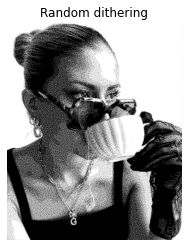

In [ ]:
####################################################
## b) Implemente el método de dithering aleatorio ##
####################################################

import random
from PIL import Image
import random
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

im = Image.open('./sample.jpg') 

new = im.copy()
pix = im.load()
newpix = new.load()
width,height=im.size
print([width,height])
window = 3

area = window*window
for i in range(width//window):    
    for j in range(height//window):
        avg = 0
        area_pix = []
        for k in range(window):
            for l in range(window):
                area_pix.append((k,l))
                try:
                    avg += pix[window*i+k,window*j+l][0] 
                    newpix[window*i+k,window*j+l] = (0,0,0) #set everything to black
                except IndexError:
                    avg += 255/2 #just an arbitrary mean value
        avg = avg/area
        val = round(avg/255 * (area+0.99) - 0.5)#0.99 due to rounding errors
        assert val<=area,'something went wrong with the val'
        random.shuffle(area_pix) #randomize pixel coordinates
        for m in range(val):
            rel_coords = area_pix.pop()
            newpix[window*i+rel_coords[0],window*j+rel_coords[1]] = (255,255,255)

new.save('dithered.jpg') #save image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Random dithering")
plt.imshow(new)


In [ ]:
####################################################
## b) Implemente el método de dithering aleatorio ##
####################################################

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

img = Image.open('./sample.jpg') 
plt.imshow(img, cmap='gray')

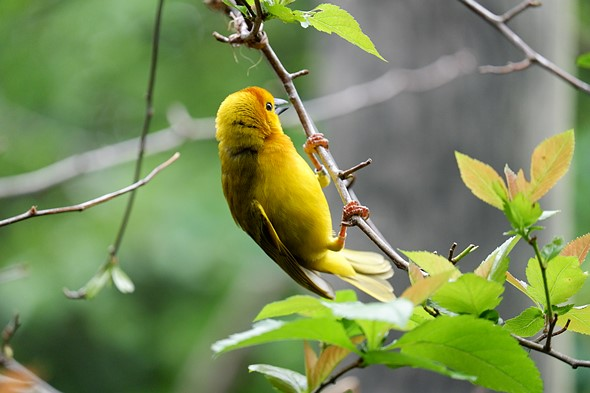

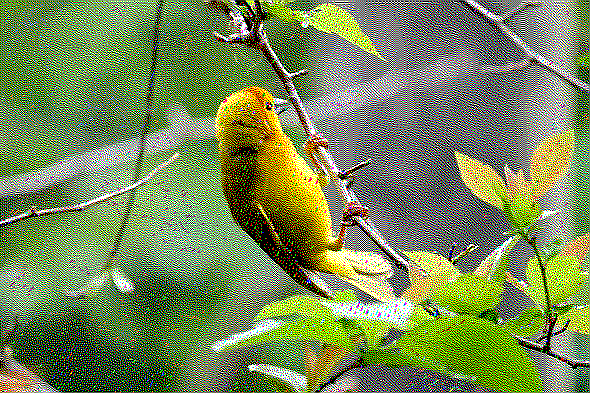

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# algorithm min 14  https://www.youtube.com/watch?v=0t8BHaLsXTM

##################################################################################
# d) Implemente el método de dithering con difusión del error de Floyd-Steinberg #
##################################################################################
def set_pixel(im,x,y,new):
    im[x,y]=new

def Floyd_Steinberg(im):
    for y in range(0,height-1):
        for x in range(1,width-1):
            old_pixel=im[x,y]
            if old_pixel<127:
                new_pixel=0
            else:
                new_pixel=255
            set_pixel(im,x,y,new_pixel)
            quant_err=old_pixel-new_pixel
            set_pixel(im,x+1,y,im[x+1,y]+quant_err*alpha)
            set_pixel(im,x-1,y+1, im[x-1,y+1] +  quant_err * beta)
            set_pixel(im,x,y+1, im[x,y+1] +  quant_err * gama )
            set_pixel(im,x+1,y+1, im[x+1,y+1] +  quant_err * delta )


    return im

img=cv2.imread("sample2.jpeg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2=img.copy()
width,height,z=img.shape
alpha=7/16.0
beta=3/16.0
gama=5/16.0
delta=1/16.0
blue=img[:,:,0]
blue= Floyd_Steinberg(blue)
green=img[:,:,1]
green= Floyd_Steinberg(green)
red=img[:,:,2]
red= Floyd_Steinberg(red)
gray1=  Floyd_Steinberg(gray)   

image = cv2.merge((blue, green, red))
cv2_imshow(img2) #original
cv2_imshow(image) #merged
#cv2_imshow(gray1) # gray